# Анализ компьютерных игр

### Описание данных

**Цель анализа:**

Выявить критерии успешности игры, для дальнейшего анализа - выявления потенциально популярного продукта, спланирования рекламных кампаний, распределения бюджета.

Таблица `games` содержит исторические данные о выпущенных играх, их продажах и рейтингах по странам и консолям до 2016 года

Описание столбцов таблицы:

   - `Name` — название игры
   - `Platform` — платформа
   - `Year_of_Release` — год выпуска
   - `Genre` — жанр игры
   - `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
   - `EU_sales` — продажи в Европе (миллионы проданных копий)
   - `JP_sales` — продажи в Японии (миллионы проданных копий)
   - `Other_sales` — продажи в других странах (миллионы проданных копий)
   - `Critic_Score` — оценка критиков (максимум 100)
   - `User_Score` — оценка пользователей (максимум 10)
   - `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Примечание*

Данные за 2016 год могут быть неполными.

**Описание рейтингов:**
 - «EC» («Early childhood») — «Для детей младшего возраста»
 - «E» («Everyone») — «Для всех»
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
 - «T» («Teen») — «Подросткам»
 - «M» («Mature») — «Для взрослых»
 - «AO» («Adults Only 18+») — «Только для взрослых»
 - «RP» («Rating Pending») — «Рейтинг ожидается»

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
pd.options.display.float_format = '{:.3f}'.format
pd.set_option('display.max_columns', 50)

In [2]:
df_games=pd.read_csv('games.csv')

In [3]:
df_games.shape

(16715, 11)

### Предобработка данных

In [4]:
#функция для первого анализа: поиск пропусков и дубликатов, оценка типов данных
def investigate_df(df):
    '''Первый взгляд на данные'''
    print('...........Первые 5 строк...........')
    display(df.head())
    print('')
    print('')
    print('...........Тип данных...........')
    print('')
    print(df.info())
    print('')
    print('')
    print('...........Пропуски...........')
    print('')
    count = 0
    for column in df.columns:
        if df[column].isna().sum()>0:
            print(column,'-',df[column].isna().sum(), 'пропусков')
            print(f'Доля пропусков в таблице составляет {(df[column].isna().sum())/len(df[column]):.1%}')
            count =+ 1
    if count == 0:
        print('Пропусков нет')
    print('')
    print('')
    print('...........Дубликаты...........')
    if df.duplicated().sum()>0:
        print('Дубликатов:', df.duplicated().sum())
    else:
        print('Дубликатов нет')
    print('')
    print('')
    print('...........Общая информация о данных в столбцах...........')
    display(df.describe(include='all').T)

In [5]:
investigate_df(df_games)

...........Первые 5 строк...........


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.000,Sports,41.360,28.960,3.770,8.450,76.000,8,E
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.000,Racing,15.680,12.760,3.790,3.290,82.000,8.3,E
3,Wii Sports Resort,Wii,2009.000,Sports,15.610,10.930,3.280,2.950,80.000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN




...........Тип данных...........

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


...........Пропуски...........

Name - 2 пропусков
Доля пропусков в таблице составляет 0.0%
Year_of_Release - 269 пропусков
Доля пропусков в таблице составляет 1.6%
Genre - 2 пропусков
Доля пропуско

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,16713,11559,Need for Speed: Most Wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Platform,16715,31,PS2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_of_Release,16446.000,NaN,NaN,NaN,2006.485,5.877,1980.000,2003.000,2007.000,2010.000,2016.000
Genre,16713,12,Action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NA_sales,16715.000,NaN,NaN,NaN,0.263,0.814,0.000,0.000,0.080,0.240,41.360
EU_sales,16715.000,NaN,NaN,NaN,0.145,0.503,0.000,0.000,0.020,0.110,28.960
JP_sales,16715.000,NaN,NaN,NaN,0.078,0.309,0.000,0.000,0.000,0.040,10.220
Other_sales,16715.000,NaN,NaN,NaN,0.047,0.187,0.000,0.000,0.010,0.030,10.570
Critic_Score,8137.000,NaN,NaN,NaN,68.968,13.938,13.000,60.000,71.000,79.000,98.000
User_Score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Вывод

    - В 6 столбцах из 11 присутствуют пропуски, их надо обработать
    - Необходимо изменить тип данных в столбцах с годом
    - Дубликатов нет

#### Приведем названия столбцов к нижнему регистру 

In [6]:
df_games.columns=df_games.columns.str.lower()

#### Обработаем пропуски

##### Столбец `name`

В столбце `name` всего два пропуска, посмотрим на них:

In [7]:
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.000,NaN,1.780,0.530,0.000,0.080,NaN,NaN,NaN
14244,NaN,GEN,1993.000,NaN,0.000,0.000,0.030,0.000,NaN,NaN,NaN


Определить, что это за игры невозможно, удалим эти строчки, тем более доля пропусков очень мала. Эти же 2 пропуска мы нашли и в столбце `genre`

In [8]:
df_games.shape

(16715, 11)

In [9]:
df_games= df_games.dropna(subset=['name'])

In [10]:
df_games.shape

(16713, 11)

У нас появились игры, у которых разный год. Это связано с тем, что игры преиздавались на одной и той дже консоил. У Соника в однои из дубликатов год отсутствует. Если бы я была 100% уверена, что игра на PS3 не переиздавалась, я бы заменила год на 2006 и продолжила обработку, так как пол миллиона продаж в Европе терять не хочется. Но у меня такой уверенности нет. Добавим фильтр по году в наш поиск дуликатов

In [11]:
df_duplicated = df_games[df_games.duplicated(subset=['name','platform', 'year_of_release'],keep=False)]
df_duplicated,

(                name platform  year_of_release   genre  na_sales  eu_sales  \
 604    Madden NFL 13      PS3         2012.000  Sports     2.110     0.220   
 16230  Madden NFL 13      PS3         2012.000  Sports     0.000     0.010   
 
        jp_sales  other_sales  critic_score user_score rating  
 604       0.000        0.230        83.000        5.5      E  
 16230     0.000        0.000        83.000        5.5      E  ,)

In [12]:
#заменим в одном из дубликатов продажи на сумму продаж двух строу и удалим дубликат
df_games.loc[604,'eu_sales'] = df_games.loc[604,'eu_sales']+df_games.loc[16230,'eu_sales']
df_duplicated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.000,Sports,2.110,0.220,0.000,0.230,83.000,5.5,E
16230,Madden NFL 13,PS3,2012.000,Sports,0.000,0.010,0.000,0.000,83.000,5.5,E


In [13]:
df_duplicated = df_games[df_games.duplicated(subset=['name','platform','year_of_release'],keep=False)]
df_duplicated

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.000,Sports,2.110,0.230,0.000,0.230,83.000,5.5,E
16230,Madden NFL 13,PS3,2012.000,Sports,0.000,0.010,0.000,0.000,83.000,5.5,E


In [14]:
df_games.shape

(16713, 11)

In [15]:
df_games=df_games.drop_duplicates(subset=['name','platform','year_of_release'])

In [16]:
df_games.shape

(16712, 11)

In [17]:
#проверим, повторяются ли названия игр
df_games.name.value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

Игр под названием "Need for Speed: Most Wanted" в таблице 12 штук, это связано с тем, что игры выходили на разных платформах в разное время.

In [18]:
df_games.query('name == "Need for Speed: Most Wanted"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.000,Racing,2.030,1.790,0.080,0.470,82.000,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.000,Racing,0.710,1.460,0.060,0.580,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.000,Racing,0.620,0.780,0.010,0.150,83.000,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.000,Racing,1.000,0.130,0.020,0.100,83.000,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.000,Racing,0.530,0.460,0.000,0.050,83.000,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.000,Racing,0.330,0.450,0.010,0.220,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.000,Racing,0.430,0.110,0.000,0.020,80.000,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.000,Racing,0.020,0.230,0.000,0.040,82.000,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.000,Racing,0.130,0.120,0.000,0.020,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.000,Racing,0.240,0.010,0.000,0.020,45.000,6.1,E


У игр, выпущенных в разные годы и на разных площадкахотличаются оценки критиков и рейтинг пользователей. А иногда и ESRB.

##### Столбец `year_of_release`

In [19]:
#посмотри на пропуски в столбце с годом выпуска
df_games.query('year_of_release !=year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.260,0.260,0.010,0.710,94.000,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.590,2.360,0.040,0.510,84.000,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.800,0.970,0.000,0.290,74.000,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.570,1.020,0.000,0.410,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.360,0.140,0.000,0.030,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.010,0.000,0.000,0.000,43.000,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.010,0.000,0.000,0.000,69.000,6.5,T
16448,Inversion,PC,NaN,Shooter,0.010,0.000,0.000,0.000,59.000,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.010,0.000,0.000,0.000,NaN,NaN,NaN


Доля пропусков в этом столбце составляет всего 1.6%,

Мы не сможем заполнить данные медианным или средним значением, так как это точно не будет являться правдой. В идеале эти данные можно поискать в интернете. Мы не можем оставить данные без ничего, так как год, как и название игры - это данные, без которых невозможно анализировать. Удаляем.

In [20]:
df_games= df_games.dropna(subset=['year_of_release'])

##### Столбец `critic_score`

In [21]:
#посмотрим на пропуски в столбце с оценками критиков
df_games[df_games['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,NaN,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,NaN,NaN,NaN
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,NaN,NaN,NaN
10,Nintendogs,DS,2005.000,Simulation,9.050,10.950,1.930,2.740,NaN,NaN,NaN


count   7982.000
mean      68.993
std       13.920
min       13.000
25%       60.000
50%       71.000
75%       79.000
max       98.000
Name: critic_score, dtype: float64


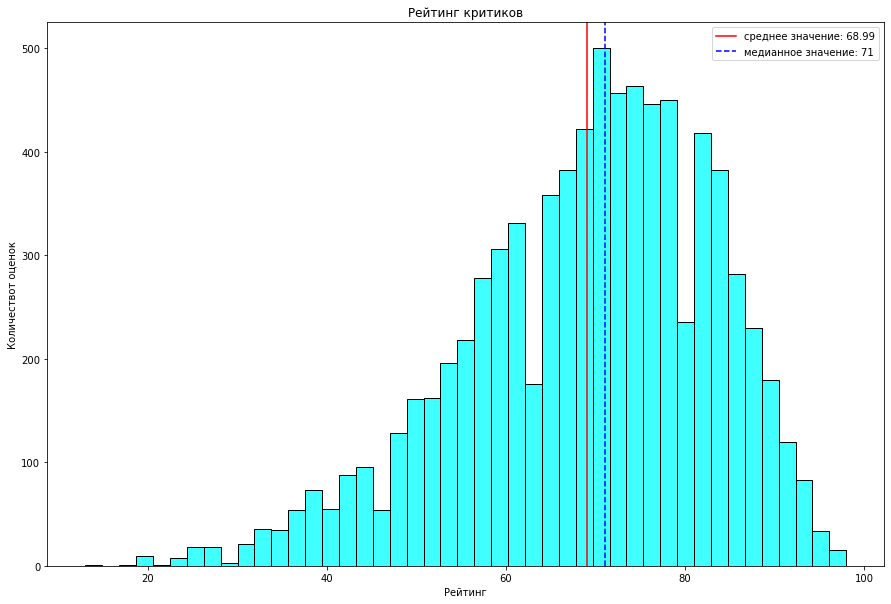

In [22]:
#выведем на экран описательную статистику по столбцу
print(df_games['critic_score'].describe())

plt.figure(figsize=(15,10)) #определим размер графика

#нарисуем гистограмму по оценкам критиков
(sns.histplot(df_games['critic_score'],color='cyan')
    .set(title='Рейтинг критиков', xlabel='Рейтинг', ylabel='Количествот оценок'))
#добавим среднее значение, выделим красным
(plt.axvline(df_games['critic_score']
            .describe()['mean'], color='r', label='среднее значение: {:.2f}'
            .format(df_games['critic_score'].describe()['mean'])))
#добавим медианное значение, выделим синим
(plt.axvline(df_games['critic_score']
            .describe()['50%'], color='b', linestyle='dashed', label='медианное значение: {:.0f}'
            .format(df_games['critic_score'].describe()['50%'])))
plt.legend()
plt.show()

Доля пропусков в таблице составляет более 50%. Их нельзя удалять. Заменять средним и медианой тоже нельзя. Поставим заглушку. Так  столбце только положительные значения, **поставим -1 вместо пропусков.** 

Медианное значение практически равно среднему, значит значения в гистограмме распределны нормально

Гистограмма показывает отрицательную ассиметрию с хвостом слева. Это означает, что больше оценок хороших.

In [23]:
df_games['critic_score'] = df_games['critic_score'].replace(np.NaN,-1)

##### Столбец `user_score`

In [24]:
df_games[df_games['user_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,-1.000,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,-1.000,NaN,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,-1.000,NaN,NaN
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,-1.000,NaN,NaN
10,Nintendogs,DS,2005.000,Simulation,9.050,10.950,1.930,2.740,-1.000,NaN,NaN


Доля пропусков в таблице около 40%, пропуски в таких количествах нельзя удалить, средним или медианой запонять некоректно. Можно оставить пропусик как есть или поставить заглушку.

Встолбце `user_score` встречается аббревиатура 'tbd' что означает "to be decided". Используется, если какая-то информация еще не определена или решение по вопросу не принято. Акроним служит для отметки неясностей или пропусков, которые надо заполнить, в информации требований.

In [25]:
df_games.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.000,Sports,3.450,2.590,0.000,0.660,-1.000,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.000,Misc,2.080,1.350,0.000,0.540,61.000,tbd,E10+
520,Zumba Fitness 2,Wii,2011.000,Sports,1.510,1.030,0.000,0.270,-1.000,tbd,T
645,uDraw Studio,Wii,2010.000,Misc,1.650,0.570,0.000,0.200,71.000,tbd,E
718,Just Dance Kids,Wii,2010.000,Misc,1.520,0.540,0.000,0.180,-1.000,tbd,E


In [26]:
#отобразим долю пропусков в таблице
(df_games[df_games['user_score'] == 'tbd']).shape[0]/df_games.shape[0]

0.1444991789819376

Доля значений tbd состаляет 14.5%, мы не можем их удалить. Для заполнения тоже информации не хватает. Но по сути tdb это те же пропуски или неясности.**Заполним все пропуски аналогичным с `critic_score` образом, т.е. -1**

In [27]:
df_games['user_score'] = df_games['user_score'].replace('tbd',np.NaN)
df_games['user_score'] = df_games['user_score'].replace(np.NaN,-1)

In [28]:
df_games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Данные представлены в виде текста, а не числа, исправим тип данных в следующем разделе

##### Столбец `rating`

In [29]:
df_games[df_games['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.000,Platform,29.080,3.580,6.810,0.770,-1.000,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.000,Role-Playing,11.270,8.890,10.220,1.000,-1.000,-1,NaN
5,Tetris,GB,1989.000,Puzzle,23.200,2.260,4.220,0.580,-1.000,-1,NaN
9,Duck Hunt,NES,1984.000,Shooter,26.930,0.630,0.280,0.470,-1.000,-1,NaN
10,Nintendogs,DS,2005.000,Simulation,9.050,10.950,1.930,2.740,-1.000,-1,NaN


Наряду с предыдущими столбцами в столбце rating около 40.5% пропусков. Надём уникальные рейтинги, которые встречаются в таблице

In [30]:
df_games['rating'].value_counts(dropna=False)

NaN     6676
E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

рейтинг K-A означает "Kids to Adults".В 1998 его заменили на "Для всех" или E. «RP» («Rating Pending») — «Рейтинг ожидается», то есть по сути его рейтинг ещё неизвестен. **Назовём такой рейтинг unknown наряду с остальными пропусками**

In [31]:
df_games['rating'] = df_games['rating'].replace('K-A','E')

In [32]:
df_games['rating'].value_counts()

E       3923
T       2905
M       1536
E10+    1393
EC         8
AO         1
RP         1
Name: rating, dtype: int64

In [33]:
df_games['rating'] = df_games['rating'].replace('K-A','E')
df_games['rating'] = df_games['rating'].fillna('Unknown')
df_games.loc[df_games['rating'] == 'RP', 'rating'] = 'Unknown'

In [34]:
df_games['rating'].value_counts()

Unknown    6677
E          3923
T          2905
M          1536
E10+       1393
EC            8
AO            1
Name: rating, dtype: int64

##### Вывод
 - Пропуски Name, Genre и Year_of_Release были удалены, так как составляли менее 2% от всего датасета
 - пропуски в сritic_score, user_ucore и rating были заменены соответствующими "заглушками"

#### Преобразуем тип данных

In [35]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Преобразуем столбец с годом к типу целочисленных, а столбец с оценками юзеров к float. Данные в этом столбце были записаны в виде текста, а не числа.

In [36]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')
df_games['user_score'] = df_games['user_score'].astype('float64')

#### Продажи во всех регионах

In [37]:
df_games['total_sales'] = df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']

In [38]:
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12895,"Murder, She Wrote",PC,2009,Adventure,0.000,0.040,0.000,0.010,-1.000,-1.000,T,0.050
3422,WarioWare D.I.Y.,DS,2009,Misc,0.170,0.180,0.200,0.040,82.000,8.700,E,0.590
610,Crazy Taxi,PS2,2001,Racing,1.130,1.120,0.060,0.220,80.000,7.900,T,2.530
9848,Space Chimps,PS2,2008,Platform,0.060,0.050,0.000,0.020,-1.000,6.600,E10+,0.130
916,Game Party 2,Wii,2008,Misc,1.280,0.430,0.000,0.170,29.000,4.600,E,1.880


### Исследовательский анализ данных

#### Распредление выпуска игр по годам

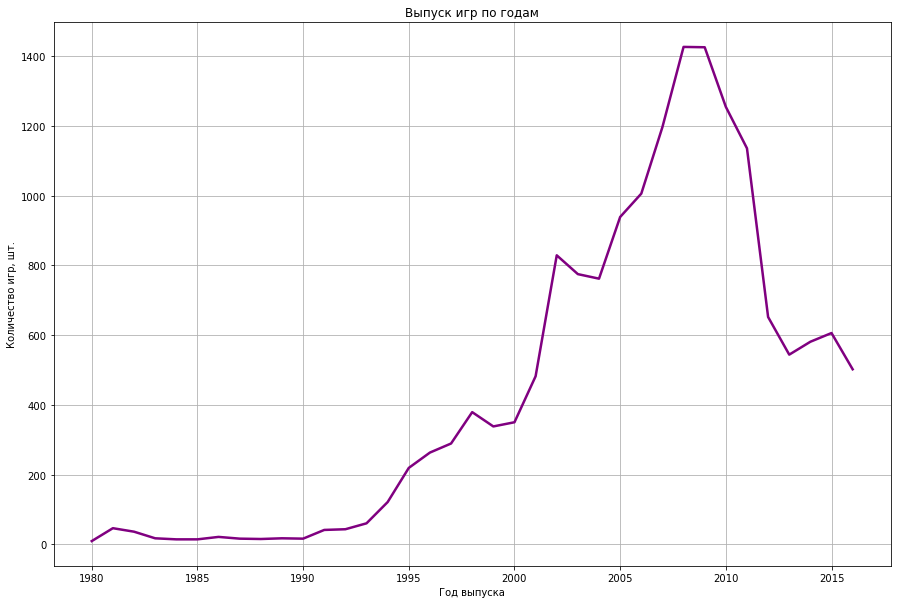

In [39]:
#график выпуска игр по годам
df_games_by_year = df_games.groupby('year_of_release').agg({'name':'count'}).reset_index()
plt.figure(figsize=(15,10))
(sns.lineplot(data=df_games_by_year, x='year_of_release', y='name', color='purple', linewidth=2.5)
    .set(title='Выпуск игр по годам', xlabel='Год выпуска', ylabel='Количество игр, шт.'))
plt.grid()
plt.show()

##### Вывод

До 2000-х игр выпускалось очень мало, с 2005 по 2009 год индустрия росла на ежегодно. Мы не будем принимать во внимание данные ниже 1995 года в EDA, в то время произошел первый заметный рост игровой индустрии, который, скорее всего, связан с широким распространением компакт-дисков и консолей. Большой спад в 2009 году связан с полследтсвиями финансового кризиса 2008. Спад продаж нового поколения консолей привёл к сокращению потенциального рынка сбыта.После того как корпорации потеряли несколько миллиардов, они начали сокращать издержки на разработку. В разгар кризиса корпорации решают сконцентрироваться на самых прибыльных брендах.В 2009 году кризис вовсе не закончился. Даже 2012 год называли самым тяжёлым для розничных продаж с 2005 года.Именно в результате кризиса начался подъём инди.

#### Продажи по платформам

In [40]:
df_games_by_platform = (
    df_games
    .pivot_table(index='platform',values='total_sales',aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
df_games_by_platform = df_games_by_platform.reset_index()

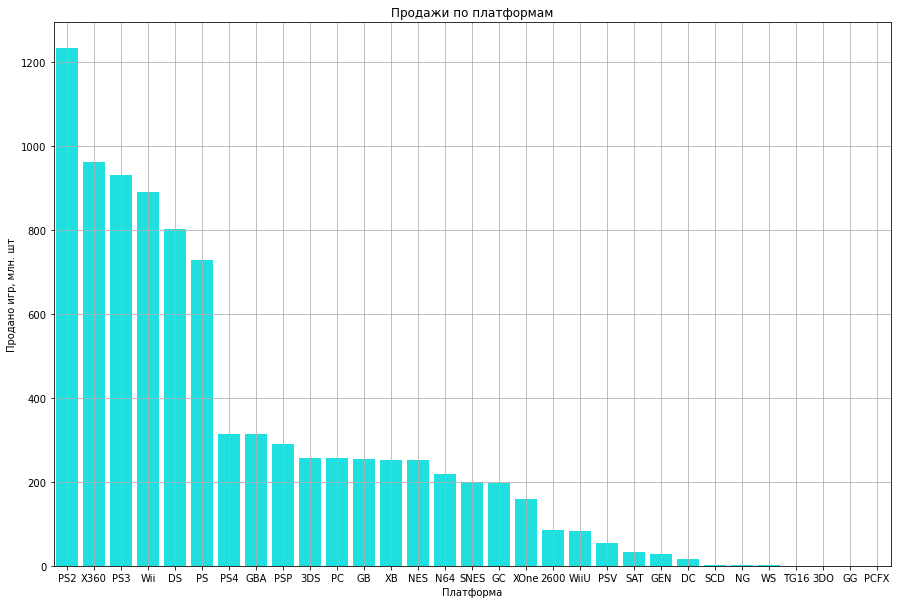

In [41]:
plt.figure(figsize=(15,10))
(sns.barplot(data=df_games_by_platform, x='platform', y='total_sales', color='cyan')
     .set(title='Продажи по платформам', xlabel='Платформа', ylabel='Продано игр, млн. шт'))
plt.grid()

Продажи PS2 начались ещё в 2000 году. Игровая приставка стала наиболее быстро продаваемой и самой популярной игровой консолью в истории. PS2 выпускалась почти 13 лет, это один из самых длинных жизненных циклов в истории игровой индустрии.

In [42]:
df_games_life = df_games.groupby(['year_of_release','platform'])['total_sales'].agg(['sum'])

In [43]:
df_games_life = df_games_life.query('year_of_release>1995').reset_index()
df_games_life

,year_of_release,platform,sum
0,1996,GB,36.030
1,1996,N64,34.100
2,1996,NG,0.100
3,1996,PC,10.580
4,1996,PCFX,0.030
...,...,...,...
174,2016,PSV,4.250
175,2016,Wii,0.180
176,2016,WiiU,4.600
177,2016,X360,1.520


In [44]:
platforms=df_games_life.platform.unique()

In [45]:
def print_plt_lines(data, column, x, y, lines, labels=['','','']):
    fig = plt.figure(figsize=(20, 10)) 

    for i in lines:
        plot_data = data[data[column]==i]
        plt.plot( 
            plot_data[x],
            plot_data[y], 
            linestyle= '-',
            marker='o',
            linewidth=2, 
            alpha=0.9,
            )
        plt.grid(True)
        plt.title(labels[0])
        plt.xlabel(labels[1])
        plt.ylabel(labels[2])
        plt.legend(lines)

plt.show()    

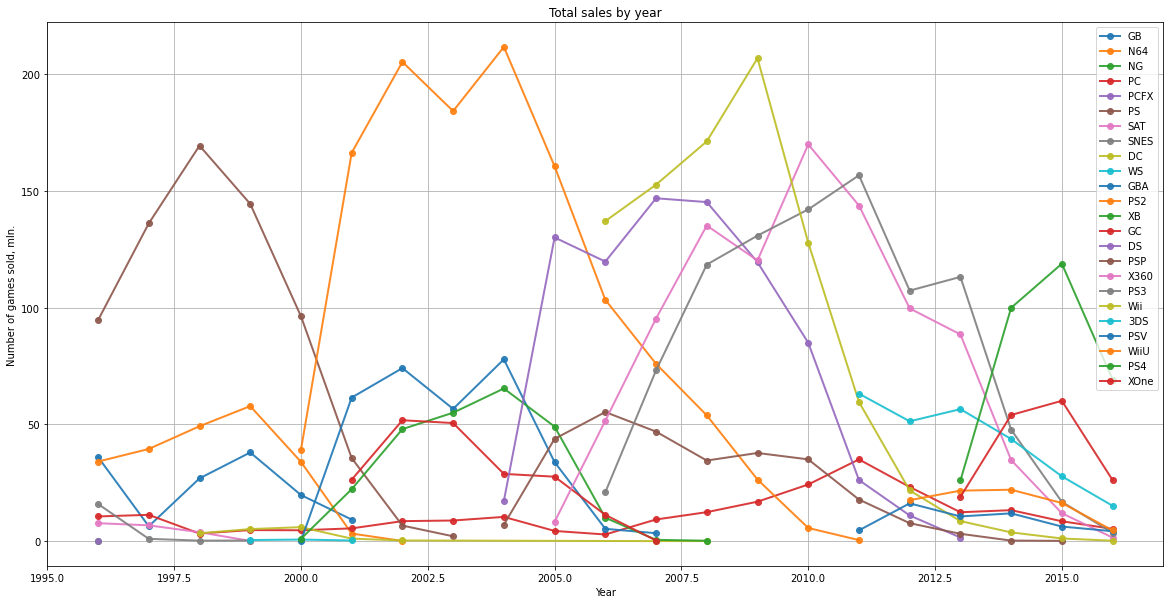

In [46]:
labels = ['Total sales by year',
          'Year',
          'Number of games sold, mln.',
          ]
print_plt_lines(df_games_life, 
                'platform', 
                'year_of_release', 
                'sum', 
                platforms,
                labels)

In [47]:
ticks = np.arange(1995, 2017, 2)

ticks

array([1995, 1997, 1999, 2001, 2003, 2005, 2007, 2009, 2011, 2013, 2015])

##### Вывод

Консоли, выпущенные до 2001 живут до 8 лет, в среднем 4-6. Хочется отметить консоль 

На графике видно, что предыдущее поколение консолей PS держится от 4 до 6 лет до выпуска следующего поколения.

Через год после выпуска PS2 просиходит пик проданных копий игр, в 2001-2005 годах. Многие игры, выпущенные на PS были перевыпущенны на консоли нового поколения, что вызвало интерес и всплеск продаж.

Выход Xbox сопровождался рекордными продажамм для Microsoft, но намного меньше, чем у PlayStation 2. Консоль нового поколения от Microsoft не выпускалась 11 лет. И в 2013 вышла X BOX One по уровню продаж похожую на свою прешдественницу.

Nintendo DS в 2004 выпустила портативную консоль - раскладушку. Пик продаж игр состаялся в 2005-2008 годах. Через 8 лет Nintendo выпускает новую консоль 3DS, и обе функционируют одновременно.

Домашние консоли Nintendo - это третий мостодонт консолей на мирвоом рынке. Продажи Wii вышедшей в 2066 году за несколько лет догнала PS2 и стала одним из лидеров по продажам.

**За актуальный период возьмем данные 2014-2016 года**

In [50]:
df_games_clean = df_games.query('year_of_release>=2014').copy()

#### Лидеры продаж среди жанров

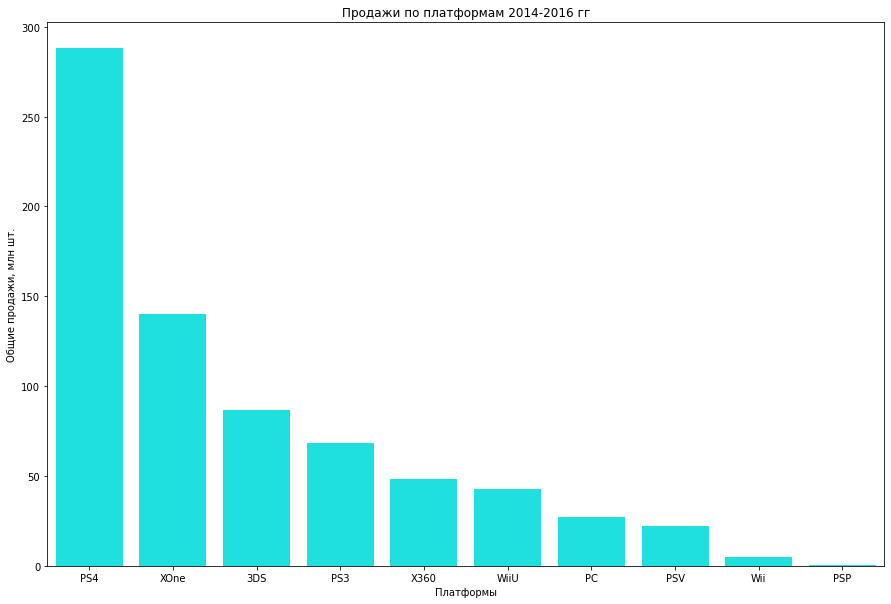

In [51]:
platform_sales_clean = (
    df_games_clean
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15,10))
(sns.barplot(data=platform_sales_clean, x=platform_sales_clean.index, y='total_sales', color='cyan')
    .set(title='Продажи по платформам 2014-2016 гг', xlabel='Платформы',ylabel='Общие продажи, млн шт.'))
plt.show()

##### Вывод

Мы видим, что по сравнению с графиком за все года по всем платформам не многие из тех, кто лидировал, добрался до 2014. 
Игровая приставка PS2 стала наиболее быстро продаваемой и самой популярной игровой консолью в истории, однако её продажи 2014 не сравнятся с продажами сменившей её PS3, а затем PS4.

In [52]:
platform_sales_clean=platform_sales_clean.reset_index()
platforms = platform_sales_clean['platform'].unique()
platforms

array(['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii',
       'PSP'], dtype=object)

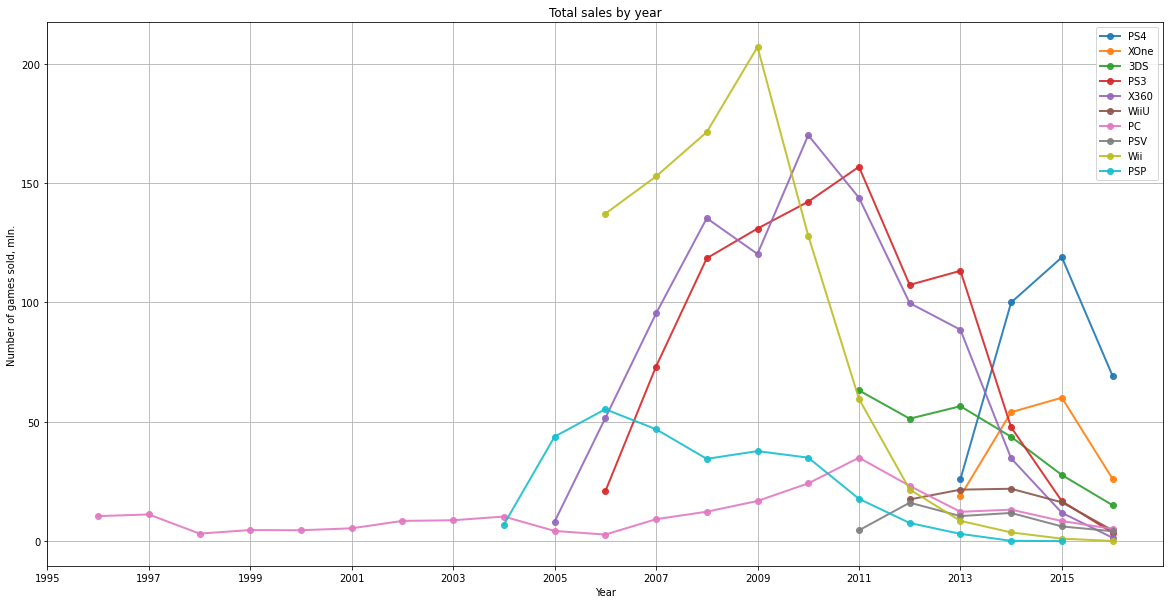

In [53]:
labels = ['Total sales by year',
          'Year',
          'Number of games sold, mln.',
          ]

print_plt_lines(df_games_life, 
                'platform', 
                'year_of_release', 
                'sum', 
                platforms,
                labels)

Для дальнейшего исследования возьмем продажи консолей `WiiU`,`XOne`,`PS3`,`3DS`,`PS4`,`PC`. Данные консоли вышли относительно недавно, согласно среднему циклу они будут поддерживаться в 2017. Они показали хороший реультат продаж за выбранный период

In [54]:
df_games_clean = df_games_clean.query('platform in ["WiiU","XOne","PS3","3DS","PS4", "PC"]')

#### График с усами по всем продажам по платформам

,count,mean,std,min,1%,25%,50%,75%,99%,max
platform,,,,,,,,,,
3DS,212.000,0.409,1.188,0.010,0.010,0.030,0.090,0.250,6.782,11.680
PC,151.000,0.179,0.329,0.010,0.010,0.020,0.060,0.200,1.235,3.050
PS3,219.000,0.311,0.633,0.010,0.010,0.040,0.110,0.325,3.996,5.270
PS4,376.000,0.766,1.615,0.010,0.010,0.057,0.185,0.690,7.740,14.630
WiiU,73.000,0.589,1.161,0.010,0.010,0.050,0.190,0.570,5.492,7.090
XOne,228.000,0.616,1.047,0.010,0.010,0.050,0.205,0.633,5.052,7.390


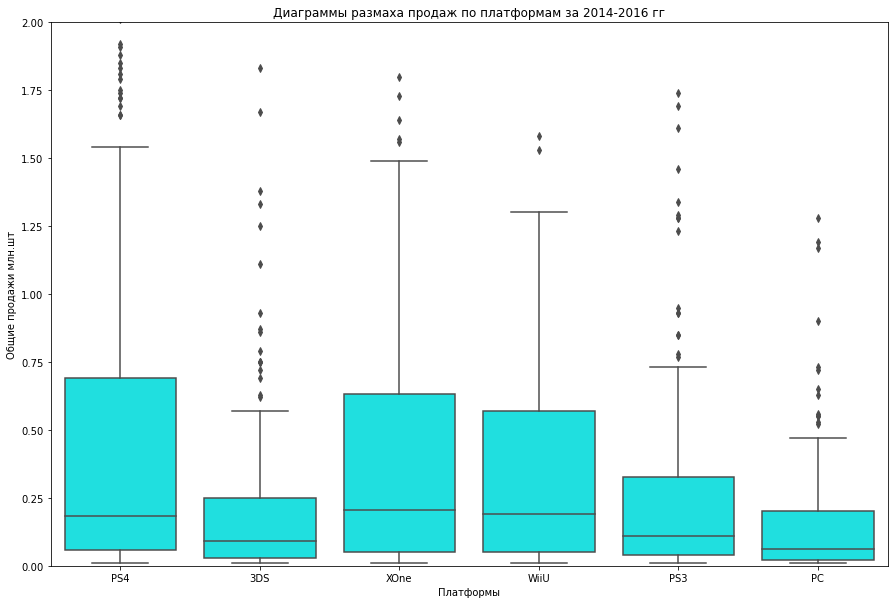

In [55]:
cd = df_games_clean.groupby(df_games_clean.platform)['total_sales']
cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
display(cd_desc)
fig = plt.figure(figsize = (15,10))
plt.ylim(0,2)
(sns.boxplot(data=df_games_clean, x='platform', y='total_sales', color='cyan')
.set(title='Диаграммы размаха продаж по платформам за 2014-2016 гг',xlabel='Платформы',ylabel='Общие продажи млн.шт'))
plt.show()

##### Вывод

    - Порезав выбросы до 3 млн продаж мы увидели, что у PS4, XOne и WiiU медиаанные продажи выше, чем у остальных консолей.
    - PS4 и 3DS показывают самые большие максимальные продажи 14.6 и 11.6 млн шт соответственно
    - Минимальные продажи у всех платформ одинаковые - 10тыс. штук.

#### Корреляция между отзывами и продажами

##### PS4

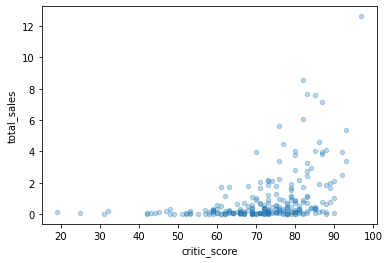

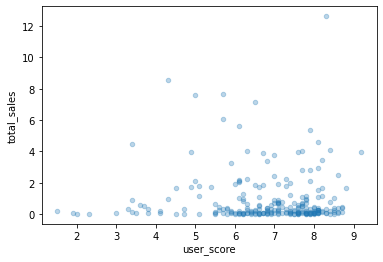

user_score     -0.043
critic_score    0.402
total_sales     1.000
Name: total_sales, dtype: float64


In [56]:
df_platform = df_games_clean.query('platform=="PS4"')
df_platform[df_platform['critic_score'] != -1].plot(kind='scatter',x='critic_score',y='total_sales', alpha=0.3)
df_platform[df_platform['user_score'] != -1].plot(kind='scatter',x='user_score',y='total_sales',alpha=0.3)
plt.show()
print(df_platform[(df_platform['user_score'] !=-1)
                  &(df_platform['critic_score']!=-1)]
                  [['user_score','critic_score','total_sales']].corr()['total_sales'])

##### Вывод

    Взаимозависимость выручки от оценков критиков заметна (особенно по сравнению с оценками пользователей). 
    Оценка пользователей с продажми не коррелирует

##### Функция для остальных графиков рассеивания

----------
3DS


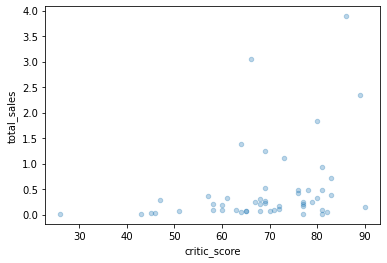

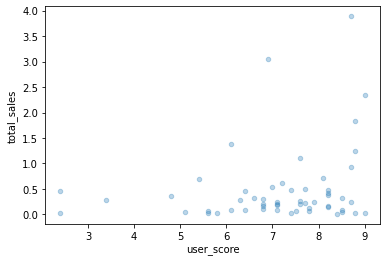

user_score     0.280
critic_score   0.285
total_sales    1.000
Name: total_sales, dtype: float64
----------
PC


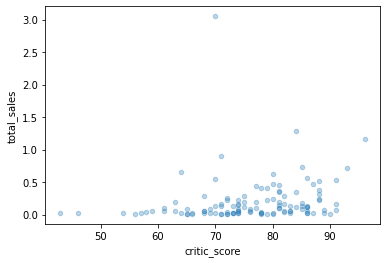

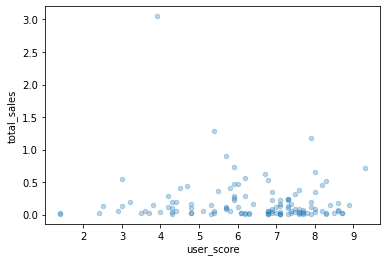

user_score     -0.090
critic_score    0.172
total_sales     1.000
Name: total_sales, dtype: float64
----------
PS3


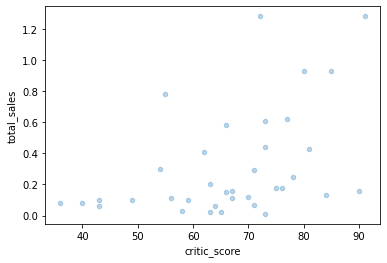

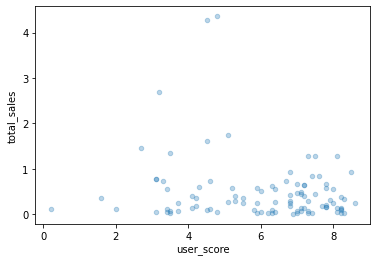

user_score     0.157
critic_score   0.447
total_sales    1.000
Name: total_sales, dtype: float64
----------
PS4


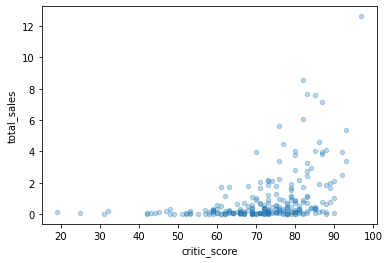

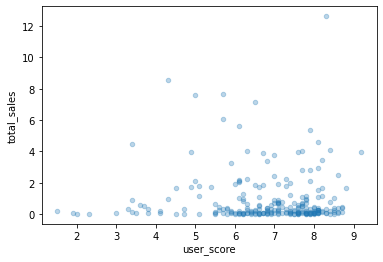

user_score     -0.043
critic_score    0.402
total_sales     1.000
Name: total_sales, dtype: float64
----------
WiiU


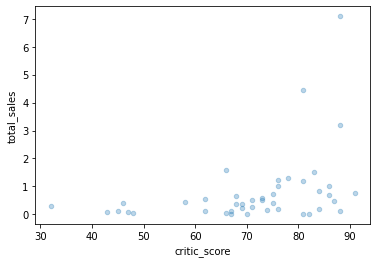

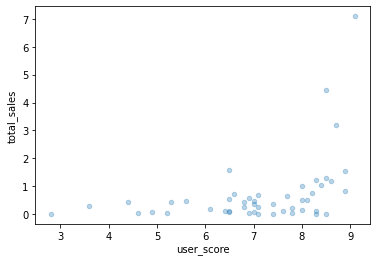

user_score     0.411
critic_score   0.376
total_sales    1.000
Name: total_sales, dtype: float64
----------
XOne


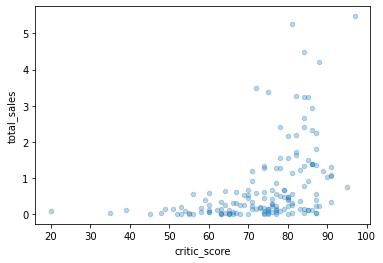

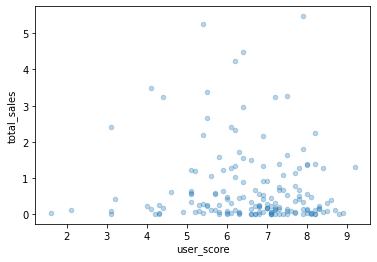

user_score     -0.092
critic_score    0.422
total_sales     1.000
Name: total_sales, dtype: float64


In [57]:
for i, df_platform in df_games_clean.groupby(['platform']):
    print("--"*5)
    print(i)
    df_platform[df_platform['critic_score'] != -1].plot(kind='scatter',x='critic_score',y='total_sales', alpha=0.3)
    df_platform[df_platform['user_score'] != -1].plot(kind='scatter',x='user_score',y='total_sales',alpha=0.3)
    plt.show()
    print(df_platform[(df_platform['user_score'] != -1)
                  &(df_platform['critic_score'] != -1)]
                  [['user_score','critic_score','total_sales']].corr()['total_sales'])

##### Вывод

Для 3DS и PC корреляции между оценками нет. 

У PS3, PS4, XOne оценки критиков демонстрируют прямую средне-слабую корреляцию с "цифрами" продаж. 
У WiiU оцинки пользователей демонстриуют корреляцию 0.4 с "цифрами" продаж, что также является прямой, слабой степенью выраженности.

#### Распределение по жанрам

#### Лидеры продаж

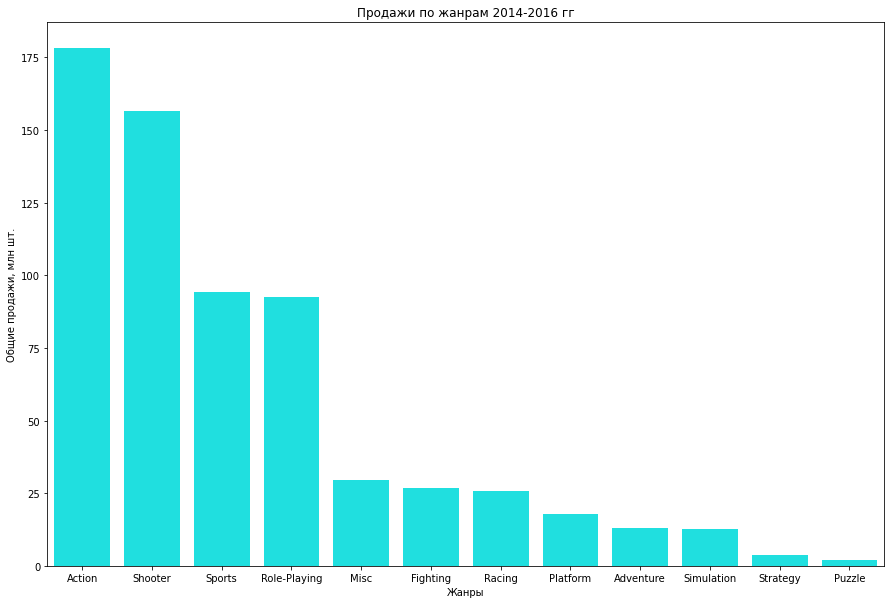

In [58]:
platform_sales_clean = (
    df_games_clean
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
plt.figure(figsize=(15,10))
(sns.barplot(data=platform_sales_clean, x=platform_sales_clean.index, y='total_sales', color='cyan')
    .set(title='Продажи по жанрам 2014-2016 гг', xlabel='Жанры',ylabel='Общие продажи, млн шт.'))
plt.show()

Вывод:

    - на графике выделяется топ жанров, пользователю нравится Action и Shooter, на втором месте Sports и Role-playing. 
    - Puzzle - приносит меньше всего прибыли, самый неуспешный среди жанров


#### График с усами

,count,mean,std,min,1%,25%,50%,75%,99%,max
genre,,,,,,,,,,
Action,461.000,0.386,0.906,0.010,0.010,0.030,0.110,0.340,3.996,12.620
Adventure,95.000,0.138,0.259,0.010,0.010,0.020,0.060,0.125,1.397,1.660
Fighting,48.000,0.560,1.315,0.010,0.010,0.058,0.140,0.345,6.290,7.550
Misc,86.000,0.345,0.793,0.010,0.010,0.030,0.095,0.350,4.463,5.270
Platform,32.000,0.553,0.764,0.010,0.013,0.085,0.175,0.735,2.807,3.210
Puzzle,12.000,0.179,0.343,0.010,0.010,0.020,0.050,0.110,1.112,1.190
Racing,58.000,0.444,1.042,0.010,0.010,0.030,0.100,0.335,4.428,7.090
Role-Playing,156.000,0.593,1.376,0.010,0.010,0.060,0.160,0.562,7.153,11.680
Shooter,112.000,1.399,2.150,0.010,0.020,0.150,0.515,1.653,7.945,14.630


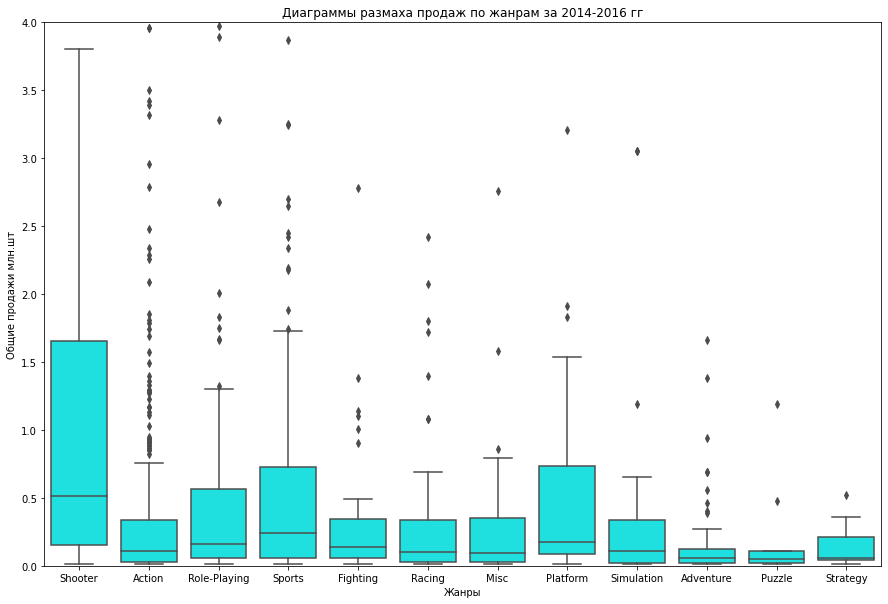

In [59]:
cd = df_games_clean.groupby(df_games_clean.genre)['total_sales']
cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
display(cd_desc)
fig = plt.figure(figsize = (15,10))
plt.ylim(0,4)
(sns.boxplot(data=df_games_clean, x='genre', y='total_sales', color='cyan')
.set(title='Диаграммы размаха продаж по жанрам за 2014-2016 гг',xlabel='Жанры',ylabel='Общие продажи млн.шт'))
plt.show()

Вывод:

    -Не смотря на то, что Action приносит большую выручку за период, у SHooter самое большое медианное значение продаж. И в максимальном значении он обгоняет Action, который лидирует по количеству выпущенных игр.
    -Меньше всего пвыпущенно игр в стиле Puzzle. Это и является причиной их неуспеха.
    -Role-playing выпущено меньше, чем action, но больше, чем Shooter/ Их среднее уступает Shooter, но превосходит Action 
    


### Портрет пользователя

In [60]:
df_games_clean.sort_values('na_sales',ascending=False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.030,5.860,0.360,2.380,-1.000,-1.000,Unknown,14.630
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.590,2.110,0.010,0.680,-1.000,-1.000,Unknown,7.390
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.350,3.490,3.100,0.740,-1.000,-1.000,Unknown,11.680
42,Grand Theft Auto V,PS4,2014,Action,3.960,6.310,0.380,1.970,97.000,8.300,M,12.620
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.270,1.370,2.430,0.480,-1.000,-1.000,Unknown,7.550
...,...,...,...,...,...,...,...,...,...,...,...,...
12632,Magi: Aratanaru Sekai,3DS,2014,Role-Playing,0.000,0.000,0.060,0.000,-1.000,-1.000,Unknown,0.060
12629,Lord of Magna: Maiden Heaven,3DS,2014,Role-Playing,0.000,0.000,0.060,0.000,68.000,7.800,T,0.060
12603,Culdcept Revolt,3DS,2016,Strategy,0.000,0.000,0.060,0.000,-1.000,-1.000,Unknown,0.060
12575,Doraemon: Nobita no Uchuu Eiyuuki,3DS,2015,Action,0.000,0.000,0.060,0.000,-1.000,-1.000,Unknown,0.060


In [61]:
df = pd.DataFrame()
def top5(column,group):
    df=df_games_clean.groupby(group)[column].sum().reset_index()
    df[column]=df[column]/df[column].sum()
    df=df.sort_values(column,ascending=False).head(5)
    return df

In [62]:
na=top5('na_sales','name')
eu=top5('eu_sales','name')
jp=top5('jp_sales','name')
total=top5('total_sales','name')

In [63]:
na_eu=na.merge(eu,on='name',how='outer')
jp_total=jp.merge(total,on='name',how='outer')
market_sales=na_eu.merge(jp_total,on='name',how='outer')

In [64]:
market_sales

,name,na_sales,eu_sales,jp_sales,total_sales
0,Call of Duty: Black Ops 3,0.044,0.036,NaN,0.037
1,Call of Duty: Advanced Warfare,0.031,NaN,NaN,0.027
2,Grand Theft Auto V,0.029,0.037,NaN,0.029
3,Super Smash Bros. for Wii U and 3DS,0.023,NaN,0.041,NaN
4,Fallout 4,0.022,NaN,NaN,NaN
5,FIFA 16,NaN,0.041,NaN,0.023
6,FIFA 15,NaN,0.038,NaN,0.020
7,FIFA 17,NaN,0.034,NaN,NaN
8,Yokai Watch 2 Ganso/Honke,NaN,NaN,0.041,NaN
9,Pokemon Omega Ruby/Pokemon Alpha Sapphire,NaN,NaN,0.040,NaN


In [65]:
na_platform=top5('na_sales','platform')
eu_platform=top5('eu_sales','platform')
jp_platform=top5('jp_sales','platform')
total_platform=top5('total_sales','platform')

In [66]:
na_eu_platform=na_platform.merge(eu_platform,on='platform',how='outer')
jp_total_platform=jp_platform.merge(total_platform,on='platform',how='outer')
market_platform=na_eu_platform.merge(jp_total_platform,on='platform',how='outer')

In [67]:
market_platform

,platform,na_sales,eu_sales,jp_sales,total_sales
0,PS4,0.393,0.522,0.192,0.441
1,XOne,0.324,0.186,0.004,0.215
2,3DS,0.090,0.065,0.566,0.133
3,PS3,0.088,0.103,0.144,0.104
4,WiiU,0.077,NaN,0.094,0.066
5,PC,NaN,0.072,NaN,NaN


In [68]:
na_genre=top5('na_sales','genre')
eu_genre=top5('eu_sales','genre')
jp_genre=top5('jp_sales','genre')
total_genre=top5('total_sales','genre')

In [69]:
na_eu_genre=na_genre.merge(eu_genre,on='genre',how='outer')
jp_total_genre=jp_genre.merge(total_genre,on='genre',how='outer')
market_genre=na_eu_genre.merge(jp_total_genre,on='genre',how='outer')

In [70]:
market_genre

,genre,na_sales,eu_sales,jp_sales,total_sales
0,Shooter,0.280,0.247,0.062,0.240
1,Action,0.258,0.274,0.313,0.273
2,Sports,0.151,0.163,NaN,0.144
3,Role-Playing,0.124,0.108,0.339,0.142
4,Misc,0.049,NaN,0.048,0.045
5,Racing,NaN,0.054,NaN,NaN
6,Fighting,NaN,NaN,0.076,NaN


In [71]:
na_rating=top5('na_sales','rating')
eu_rating=top5('eu_sales','rating')
jp_rating=top5('jp_sales','rating')
total_rating=top5('total_sales','rating')

In [72]:
na_eu_rating=na_rating.merge(eu_rating,on='rating',how='outer')
jp_total_rating=jp_rating.merge(total_rating,on='rating',how='outer')
market_rating=na_eu_rating.merge(jp_total_rating,on='rating',how='outer')

In [73]:
market_rating

,rating,na_sales,eu_sales,jp_sales,total_sales
0,M,0.346,0.355,0.092,0.321
1,Unknown,0.240,0.224,0.604,0.277
2,E,0.172,0.213,0.114,0.182
3,T,0.138,0.128,0.137,0.134
4,E10+,0.103,0.079,0.054,0.086


#### Вывод

Портрет пользователя рынка Северной Америки:

     - Топ5 игр пользователя включает шутеры `Call of Duty: Black Ops 3` 2015 года и `Call of Duty: Advanced Warfare` 2014 года, `GTA V` в стиле action, `Super Smash Bros.` for Wii U and 3DS и ещё один action `Fallout 4`
     - PS4 - самая популярная консоль у пользователя из Америки, 39% от продаж. На втором месте с 30% - XOne 
     - 28% продаж приходится на	Shooter, 26% на Action
     - 35% продаж приходятся на игры для взрослых
     
Портрет пользователя рынка Европы: 

     -`Call of Duty: Black Ops 3` 2015 года и  `GTA V также в топе у европейского пользователя. Наряду с перечисленными играми в жанре Action пользователь из Европы непрочь погонять в футбол : FIFA 15, FIFA 16 и FIFA 17 надежно поселились в сердечке европейца.
     -Более 50% продаж у PS4, немудоено, на этой консоли очень удобно играть в FIFA
     -27% выбирает Action,  25% Shooter 16%, Sports.
     -Игры 18+ составляют 36% о всех продаж. Это логично, ведь в Shooter много насилия и убийств 

Портрет пользователя рынка Японии:

    - у японского пользователя самый своеобразный топ. Только `Super Smash Bros. for Wii U and 3DS` пересекается с другими рынками. Yokai Watch 2 Ganso/Honke, Pokemon Omega Ruby/Pokemon Alpha Sapphire, Monster и Yokai Watch 2 Shinuchi в топ5 по данному рынку. Все эти игры выходили на nintendo 3DS
    - Nintendo 3DS составляет 56.6% всех продаж в Японии
    - 33.9% выделяют role-playinng игры
    - Большая часть игр, продааемых в Японии, не помечена рейтингом ESRB. по тем, что есть - подростки - основной потребитель рынка Японии.

### Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [74]:
df_2_platforms = df_games_clean.query('user_score!= -1 and (platform == "XOne" or platform == "PC")')

In [75]:
cd = df_2_platforms.groupby(df_2_platforms.platform)['user_score']
cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])

In [76]:
cd = df_2_platforms.groupby(df_2_platforms.platform)['user_score']
cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
cd_desc['var']= [np.var(cd.get_group('XOne'), ddof=1), np.var(cd.get_group('PC'), ddof=1)]
display(cd_desc)

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
platform,,,,,,,,,,,
PC,122.000,6.298,1.703,1.400,1.610,5.325,6.800,7.600,8.858,9.300,1.891
XOne,165.000,6.595,1.375,1.600,2.740,5.800,6.800,7.600,8.836,9.200,2.901


Н0 - Средние пользовательские рейтинги платформ Xbox One и PC **одинаковы**

Н1 - Средние пользовательские рейтинги платформ Xbox One и PC **различаются**

In [77]:
with_user_score = df_games_clean[df_games_clean['user_score'] != -1]
print('Средние пользовательские рейтинги платформ Xbox One', round(with_user_score.query('platform=="XOne"')['user_score'].mean(),2),)
print('Средние пользовательские рейтинги платформ PC',round(with_user_score.query('platform=="PC"')['user_score'].mean(),2))
print()

sample_1 = with_user_score[with_user_score['platform'] == 'XOne']['user_score'] 
sample_2 = with_user_score[with_user_score['platform'] == 'PC']['user_score'] 
results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу нельзя')

Средние пользовательские рейтинги платформ Xbox One 6.59
Средние пользовательские рейтинги платформ PC 6.3

p-значение:  0.10450507919348415
Отвергнуть нулевую гипотезу нельзя


#### Средние пользовательские рейтинги жанров Action и Sports разные

In [78]:
df_2_genre = df_games_clean.query('user_score!= -1 and (genre == "Action" or genre == "Sports")')

In [79]:
cd = df_2_genre.groupby(df_2_genre.genre)['user_score']
cd_desc = cd.describe(percentiles = [.01,.25,.75,.99])
cd_desc['var']= [np.var(cd.get_group('Action'), ddof=1), np.var(cd.get_group('Sports'), ddof=1)]
display(cd_desc)

,count,mean,std,min,1%,25%,50%,75%,99%,max,var
genre,,,,,,,,,,,
Action,246.000,6.708,1.381,2.000,2.445,6.100,7.000,7.700,8.755,9.000,1.907
Sports,104.000,5.377,1.784,0.200,1.403,4.275,5.700,6.700,8.297,8.700,3.183


Н0 - Средние пользовательские рейтинги жанров Action и Sports **одинаковые**

Н1 - Средние пользовательские рейтинги жанров Action и Sports **разные**

In [80]:
print('Средние пользовательские рейтинги жанров Action', round(with_user_score.query('genre=="Action"')['user_score'].mean(),2),)
print('Средние пользовательские рейтинги жанров Sports', round(with_user_score.query('genre=="Sports"')['user_score'].mean(),2))
print()

sample_1 = with_user_score[with_user_score['genre'] == 'Action']['user_score'] 
sample_2 = with_user_score[with_user_score['genre'] == 'Sports']['user_score'] 
results = st.ttest_ind(sample_1, sample_2)
alpha = 0.05

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергнуть нулевую гипотезу нельзя')

Средние пользовательские рейтинги жанров Action 6.71
Средние пользовательские рейтинги жанров Sports 5.38

p-значение:  4.3924169518566543e-13
Отвергаем нулевую гипотезу


### Общий вывод

Мы проанализировали три основных рынка продаж компьютерных игр. Мы видим, что рынок компьютерных игр переживал мощный подъем с развитием новых технологий как изготовления игр, так и изготовления консолей. мы видим спад после кризиса и переход к более качественным и зрелищным играм.

Иры, выпущенные на разных консолях приност разные выручки, имеют разные оценки критиков.

Оценки критиков очень слабо влиют на выручки игр, так же как и оценки пользоватеелй.

Интернет-магазину стоит обратить внимание на игры в жанре Action и Shooter - они нравятся пользователям по всему миру. Если продажи направлены в Японию игры в жанре role-play тоже будуь иметь успех.

В америке и Европе люди чаще будут покупать игры на PS4, а вот жителям Японии лучше прорекламировать Nintendo 3DS
